# [실습]  머신러닝-회귀 - 아들 키 예측

### 참고
- [코드]: https://wikidocs.net/42250
- [데이터] 출처: https://github.com/cranberryai/todak_todak_python/tree/master/machine_learning/regression
- [데이터] URL: https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true


### 목표
- 아버지와 아들의 키 데이터를 학습하여 향후 **아들의 키를 예측**한다.

---------------

### [실습] 사이킷런 모델 사용하여 아들 키 예측하기
#### 머신러닝 모델(회귀)
- Ridge regression 알고리즘
- $ \beta_{ridge} : argmin[\sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1}-\dotsc-\beta_px_{ip})^2 + \lambda\sum_{j=1}^p\beta_j^2] $

#### 평가지표
- score (accuracy_score)
> sklear의   classifier 객체의 score 메서드 사용 <br>
> (또는) sklearn.metrics의 accuracy_score 메서드 사용

#### #아버지와 아들의 키 데이터 상관관계 분석: 그래프 & 상관계수 함수 사용

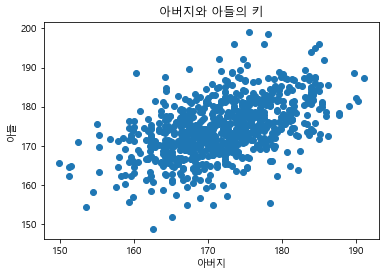

,Father,Son
Father,1.00000,0.49967
Son,0.49967,1.00000


In [1]:
# 아버지와 아들의 키 데이터 상관관계 분석: 그래프 & 상관계수 함수 사용
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 6)

#----------------------
# 1. 데이터 준비하기
#----------------------
train_df = pd.read_excel('data/아버지아들키.xlsx', sheet_name='train')
train_df

# 산점도 시각화
plt.scatter(train_df.Father, train_df.Son)
plt.title('아버지와 아들의 키')
plt.xlabel('아버지')
plt.ylabel('아들')
plt.show()

# 아버지와 아들의 키에 대한 상관관계 값
train_df.corr()
#----------------------
# 시각화
#----------------------

#### #머신러닝 회귀분석으로 예측 모델 생성

In [3]:
#머신러닝 회귀분석으로 예측 모델 생성
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np

#----------------------
# 1. 데이터 준비하기
#----------------------
train_df = pd.read_excel('data/아버지아들키.xlsx', sheet_name='train')
test_df = pd.read_excel('data/아버지아들키.xlsx', sheet_name='test')
# test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')
# print(train_df)


#----------------------
# 2. 데이터 전처리
#----------------------
# 불필요한 데이터 삭제
x_train = train_df.drop(['Son'], axis=1)  # train_df['Father']
x_test = test_df.drop(['Son'], axis=1)    # test_df['Father']
y_train = train_df['Son']
y_test = test_df['Son']
x_train.head()

# numpy 데이터로 변환
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(y_train.shape)


#----------------------
# 3. 모델 생성
#----------------------
# 하이퍼파라미터: 모델링할 때 사용자가 직접 세팅해주는 값
# 하이퍼파라미터 alpha값 1로 설정
alpha=1.0
model = Ridge(alpha=alpha)

#----------------------
# 4. 모델 학습 & 검증(평가)
#----------------------
# 모델 학습
model.fit(x_train, y_train)

# 회귀계수와 intercept 가져오기
m = model.coef_[0].round(2)
b = model.intercept_.round(2)
print(f'Ridge Regression, alpha={alpha} \n y = {m}x + {b}')
print('-'*30)

# 모델 검증
print(f'train 모델 검증(model.score): { model.score(x_train, y_train) }') 
print(f'test  모델 검증(model.score): { model.score(x_test, y_test) } ') #0.251997790584662


#----------------------
# 5. 모델 예측
#----------------------
x_test = np.array([ [164.338] ])

y_predict = model.predict(x_test)

print(f'예측 결과(예상 키): { y_predict[0] }') #169.66660924268297

(755, 1)
(755,)
Ridge Regression, alpha=1.0 
 y = 0.52x + 85.31
------------------------------
train 모델 검증(model.score): 0.2496700497423866
test  모델 검증(model.score): 0.25199816954433096 
예측 결과(예상 키): 170.46941500035183


In [15]:
x_test = np.array([ [180] ])

y_predict = model.predict(x_test)

print(f'예측 결과(아들 예상 키): { y_predict[0] }') 

예측 결과(아들 예상 키): 178.58533641706157


----------------

### [실습] Tensorflow 모델 사용하여 아들 키 예측하기

In [16]:
!pip install tensorflow==2.5.0


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np
tf.random.set_seed(777) #하이퍼파라미터 튜닝을 위해 실행시 마다 변수가 같은 초기값 가지게 하기


#----------------------
# 1. 데이터 준비하기
#----------------------
train_df = pd.read_excel('data/아버지아들키.xlsx', sheet_name='train')
train_df = pd.read_excel('data/아버지아들키.xlsx', sheet_name='test')
# test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')
train_df


#----------------------
# 2. 데이터 전처리
#----------------------
# 불필요한 데이터 삭제
x_train = train_df.drop(['Son'], axis=1)
x_test = test_df.drop(['Son'], axis=1)
y_train = train_df['Son']
y_test = test_df['Son']
x_train.head()

# numpy 데이터로 변환
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(y_train.shape)


#----------------------
# 3. 모델 생성
#----------------------
input = tf.keras.layers.Input(shape=(1,))
net = tf.keras.layers.Dense(units=32, activation='relu')(input)
net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=1)(net)

model = tf.keras.models.Model(input, net)


#----------------------
# 4. 모델 학습 & 검증(평가)
#----------------------
# 모델 학습
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test)) 

# 모델 검증



#----------------------
# 5. 모델 예측
#----------------------
x_test = np.array([ [164.338] ])

y_predict = model.predict(x_test)

print(f'예측 결과(예상 키): { y_predict[0][0] }') 


(323, 1)
(323,)
Epoch 1/50
11/11 [==============================] - 2s 34ms/step - loss: 9862.1338 - val_loss: 5935.7461
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 3972.8386 - val_loss: 1816.2051
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 994.4384 - val_loss: 277.6930
Epoch 4/50
11/11 [==============================] - 0s 20ms/step - loss: 122.8924 - val_loss: 50.7779
Epoch 5/50
11/11 [==============================] - 0s 18ms/step - loss: 69.6589 - val_loss: 86.5732
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 79.0446 - val_loss: 62.3300
Epoch 7/50
11/11 [==============================] - 0s 18ms/step - loss: 54.6994 - val_loss: 48.8524
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 48.3825 - val_loss: 49.1819
Epoch 9/50
11/11 [==============================] - 0s 19ms/step - loss: 49.2230 - val_loss: 48.7111
Epoch 10/50
11/11 [==============================] - 0s 17ms/ste

In [19]:
x_test = np.array([ [180] ])

y_predict = model.predict(x_test)

print(f'예측 결과(아들 예상 키): { y_predict[0] }') 

예측 결과(아들 예상 키): [182.19986]


-------------------

THE END